# **ATIVIDADE Projeto 3 **
### M12- Fundamentos da Descoberta de Dados

Nesse projeto trabalharemos com a base de dados de produtos de um supermercado do Chile. A ideia é que vocês apliquem os conceitos estatísticos vistos no último módulo, mais os conceitos de visualizações de dados através de gráficos e finalizem publicando no seu github!
Os campos do nosso dataframe são:

**Title:** Nome do produto. \
**Marca:** A marca do produto.\
**Preco_Normal:** O preço em que o produto costuma ser vendido quando não há desconto.\
**Preco_Desconto:** O preço vendido após o desconto ser aplicado.\
**Preco_Anterior:** Preço em que era comercializado o produto antes do desconto aplicado.\
**Desconto:** Total de desconto aplicado.

As colunas que aparecem com valores 0 são para os produtos onde não tivemos descontos aplicados.

### **Objetivos**
#### 1 - Encontre a média e mediana dos preços por categoria de produto.
 Identifique as categorias que parecem ter um valor de média abaixo ou acima da mediana. 
#### 2 - Calcule o desvio padrão por categoria de produto. 
Qual o comportamento da média e mediana nas categorias com maior desvio? 

#### 3 - Plot um boxplot da distribuição do Preco_Normal para a categoria que você identificou que tem o maior desvio padrão. Como é a distribuição desses dados segundo o boxplot? Você identifica muitos outliers?

#### 4 - Plote um gráfico de barras onde temos a média de descontos por categoria.

#### 5 - Plote um gráfico de mapa interativo agrupando os dados por categoria, marca e trazendo a média de desconto.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
df = pd.read_csv("MODULO7_PROJETOFINAL_BASE_SUPERMERCADO.csv", delimiter=',')


In [8]:
#dimensão 1107x7
#valores unicos 1065

print(df.dtypes)
#df.head(25)
#df.info()

title             object
Marca             object
Preco_Normal       int64
Preco_Desconto     int64
Preco_Anterior     int64
Desconto           int64
Categoria         object
dtype: object


In [9]:
#criar categoria preco vendido
#preço normal Ou preco com desconto serão incluidas
df['Preco_Venda'] = 0.0
df['Preco_Promo'] = 0.0

for i in df.index:
     if df.loc[i,'Preco_Normal'] != 0:
         df.loc[i, 'Preco_Venda'] = df.loc[i, 'Preco_Normal']
         df.loc[i, 'Preco_Promo'] = df.loc[i, 'Preco_Normal']  
     else:
         df.loc[i, 'Preco_Venda'] = df.loc[i, 'Preco_Anterior']
         df.loc[i, 'Preco_Promo'] = df.loc[i, 'Preco_Desconto']  
df

,title,Marca,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto,Categoria,Preco_Venda,Preco_Promo
0,"Pack 12 un, Leche extra proteína 1 L",Loncoleche,19788,0,0,0,lacteos,19788.0,19788.0
1,"Pack 12 un, Leche chocolate receta original 1 L",Soprole,18228,0,0,0,lacteos,18228.0,18228.0
2,"Pack 12 un, Leche semidescremada chocolate 1 L",Soprole,18228,0,0,0,lacteos,18228.0,18228.0
3,"Pack 12 un, Leche semidescremada frutilla 1 L",Soprole,18228,0,0,0,lacteos,18228.0,18228.0
4,"Pack 12 un, Leche sin lactosa chocolate 1 L",Loncoleche,17988,0,0,0,lacteos,17988.0,17988.0
...,...,...,...,...,...,...,...,...,...
1102,"Helado bresler pote cassata 2,4l",Bresler,0,4359,5449,1090,congelados,5449.0,4359.0
1103,"Helado Trisabor chocolate lúcuma y manjar 2,4 L",Bresler,0,4359,5449,1090,congelados,5449.0,4359.0
1104,Shampoo Reconstrucción Completa 400 ml,Dove,0,2690,3849,1159,belleza-y-cuidado-personal,3849.0,2690.0
1105,Acondicionador Hidratación Intensa 400 ml,Dove,0,2690,3849,1159,belleza-y-cuidado-personal,3849.0,2690.0


#### Média e mediana por categoria
1) **Quantas categorias existem ? Como é o comportamento da média e mediana das categorias?**\
   Os dados apresentam um total de 7 categorias. São elas: lacteos, belleza-y-cuidado-personal,congelados,frutas, comidas-preparadas,verduras, instantaneos-y-sopas. Para avaliar os valores de média e mediana, agrupamos os preços em duas categorias devido à presença de descontos. Isso permite uma análise mais precisa do preço de venda dos produtos naquele momento.As duas novas categorias criadas são:\
**Preço_Venda**: composta pelos valores das colunas **Preço_Normal + Preço_Anterior**.\
**Preço_Promo**: composta pelos valores das colunas **Preço_Normal + Preço_Desconto**.\
Essa reorganização foi realizada para evitar a inclusão de valores zero no cálculo das médias e medianas, o que poderia distorcer os resultados. Atribuir um valor zero implicaria que alguns produtos seriam gratuitos, o que não reflete a realidade.
 
Todas as categorias apresentam valores distintos de média e mediana. Isso
dá indicativos que a distribuição dos preços nas categorias não segue uma distrubuição normal, ou há outliers no valor dos preços. De fato, ao realizar o calculo de diferença relativa entre os valores de média e mediana, observamos que essa diferênça é de 5% para *comidas-preparadas*( menor diferença encontrada) e 58% para *lacteos*. a tabela resumo de preços apresenta os demais valores.

In [10]:
#Quantas categorias existem
n_cat=df['Categoria'].nunique() # 7 categorias
L_cat=df['Categoria'].unique()  # 

#estatisticas_por_categoria = df.groupby("Categoria")["Preco_Normal"].agg(["mean", "median", "std"])
#estatisticas_por_categoria

md_cat_p =df.groupby('Categoria')['Preco_Venda'].mean()
mdn_cat_p=df.groupby('Categoria')['Preco_Venda'].median()
std_cat_p=df.groupby('Categoria')['Preco_Venda'].std()

resumo_preco = pd.concat([md_cat_p, mdn_cat_p,std_cat_p], axis=1, keys=['media', 'mediana','desvio '])

#dif=abs(md_cat_p-mdn_cat_p)
dif = []
resumo_preco['diferenca']=0.0
# Loop sobre os 7 elementos
for i in resumo_preco.index:
    a=float(resumo_preco.loc[i,'media'] )
    b=float(resumo_preco.loc[i,'mediana'])
    if a > b:
        resumo_preco.loc[i,'diferenca']=abs(a - b) / a
        #dif.append(abs(a - b) / a)
    else:
        resumo_preco.loc[i,'diferenca']=abs(b - b) / a       
print(resumo_preco)


                                  media  mediana      desvio   diferenca
Categoria                                                               
belleza-y-cuidado-personal  2359.071130   2090.0  2105.607874   0.114058
comidas-preparadas          3433.304348   3640.0  1779.820251   0.000000
congelados                  3040.876596   2979.0  1892.202223   0.020348
frutas                      1724.473684   1195.0  1639.151114   0.307035
instantaneos-y-sopas         765.491228    439.0  1170.232869   0.426512
lacteos                     2474.178971   1159.0  3986.180270   0.531562
verduras                    1343.296875   1180.0  1012.699625   0.121564


In [11]:
#@promocional
md_cat_p =df.groupby('Categoria')['Preco_Promo'].mean()
mdn_cat_p=df.groupby('Categoria')['Preco_Promo'].median()
std_cat_p=df.groupby('Categoria')['Preco_Promo'].std()

resumo_preco = pd.concat([md_cat_p, mdn_cat_p,std_cat_p], axis=1, keys=['media', 'mediana','desvio '])

#dif=abs(md_cat_p-mdn_cat_p)
dif = []
resumo_preco['diferenca']=0.0
# Loop sobre os 7 elementos
for i in resumo_preco.index:
    a=float(resumo_preco.loc[i,'media'] )
    b=float(resumo_preco.loc[i,'mediana'])
    if a > b:
        resumo_preco.loc[i,'diferenca']=abs(a - b) / a
        #dif.append(abs(a - b) / a)
    else:
        resumo_preco.loc[i,'diferenca']=abs(b - b) / a       
print(resumo_preco)

                                  media  mediana      desvio   diferenca
Categoria                                                               
belleza-y-cuidado-personal  2834.882845   2543.0  2118.001508   0.102961
comidas-preparadas          3780.478261   3590.0  1635.885064   0.050385
congelados                  2996.251064   3059.0  1781.784938   0.000000
frutas                      1724.473684   1195.0  1639.151114   0.307035
instantaneos-y-sopas         883.105263    459.0  1106.007164   0.480243
lacteos                     2564.015660   1279.0  3898.278311   0.501173
verduras                    1343.296875   1180.0  1012.699625   0.121564


In [69]:
#listagem_de_preços_categorias
# belleza_cuidado    = df[df['Categoria'] == resumo_preco.index[0]]
# comidas_preparadas = df[df['Categoria'] == resumo_preco.index[1]]
# congelados         = df[df['Categoria'] == resumo_preco.index[2]]
# frutas             = df[df['Categoria'] == resumo_preco.index[3]]
# instantaneos       = df[df['Categoria'] == resumo_preco.index[4]]
# lacteos            = df[df['Categoria'] == resumo_preco.index[5]]
# verduras           = df[df['Categoria'] == resumo_preco.index[6]]




(array([ 9., 23., 21.,  6.,  1.,  1.,  1.,  0.,  1.,  1.]),
 array([   0.,  585., 1170., 1755., 2340., 2925., 3510., 4095., 4680.,
        5265., 5850.]),
 <BarContainer object of 10 artists>)

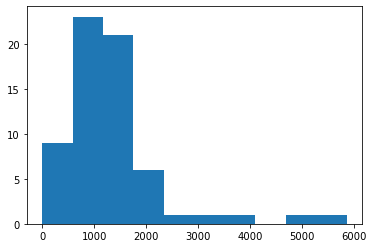

In [96]:
plt.hist(verduras['Preco_Normal'])

nan